In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import array

import caffe

# set display defaults
plt.rcParams['figure.figsize'] = (10, 10)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap

In [37]:
# load log file from server
#os.system("scp dijkstra:rbr_cnn/rtracker_caffe/data/ratsi_mean.binaryproto ../data/ratsi_mean_full.binaryproto")
#mean_file = '../data/ratsi_mean_full.binaryproto'

file_prefix = '/home/malte/datasets/RatSI/c3d_features/Observation01/data_00000001'

In [38]:
def get_features(feature_files, feature_layer):
    ''' From binary feature files, take an average (for multiple clips) '''

    # in case of a single feature_file, force it to a list
    if isinstance(feature_files, basestring):
        feature_files = [feature_files]

    # read each feature, take an an average
    for clip_count, feature_file in enumerate(feature_files):
        print "clip_count={}, feature_file={}".format(clip_count, feature_file)
        if not os.path.exists(feature_file):
            feature_file += '.' + feature_layer

        if not os.path.exists(feature_file):
            print "[Error] feature_file={} does not exist!".format(feature_file)
            return None

        # read binary data
        f = open(feature_file, "rb")
        # read all bytes into a string
        s = f.read()
        f.close()
        (n, c, l, h, w) = array.array("i", s[:20])
        print n, c, l, h, w
        feature_vec = np.array(array.array("f", s[20:]))
        feature_vec = np.reshape(feature_vec, (n, c, l, h, w))

        if clip_count == 0:
            feature_vec_avg = feature_vec
        else:
            feature_vec_avg += feature_vec

    feature_vec_avg = feature_vec_avg / len(feature_files)

    return feature_vec_avg

In [39]:
data = get_features(file_prefix, 'res5b')
print data.shape

clip_count=0, feature_file=/home/malte/datasets/RatSI/c3d_features/Observation01/data_00000001
1 512 1 7 7
(1, 512, 1, 7, 7)


In [40]:
def vis_square(data):
    """Take an array of shape (n, height, width) or (n, height, width, 3)
       and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)"""
    
    # normalize data for display
    data = (data - data.min()) / (data.max() - data.min())
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = (((0, n ** 2 - data.shape[0]),
               (0, 1), (0, 1))                 # add some space between filters
               + ((0, 0),) * (data.ndim - 3))  # don't pad the last dimension (if there is one)
    data = np.pad(data, padding, mode='constant', constant_values=1)  # pad with ones (white)
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data.squeeze()); plt.axis('off')

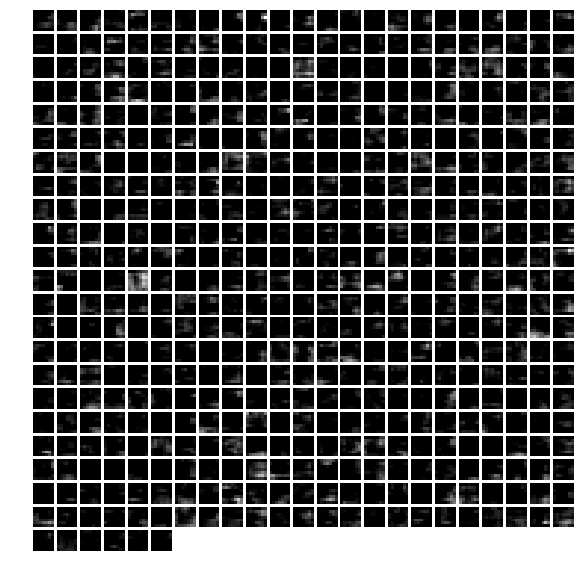

In [41]:
vis_square(data.squeeze())

In [49]:
N = 100
first_frame = 1
last_frame = 94

range(first_frame, last_frame - last_frame % 5, 5)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86]